Generate data

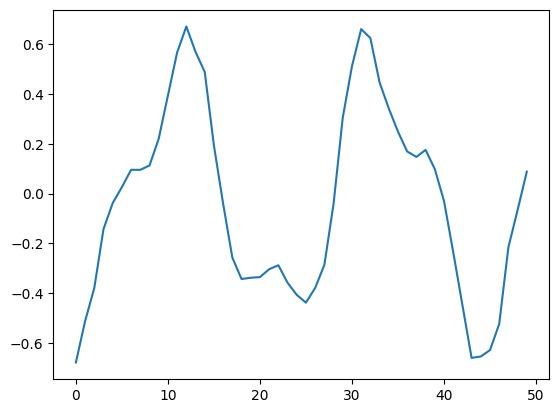

In [23]:
import numpy as np

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    #print("returns are", freq1, freq2, offsets1, offsets2)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # +wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))            # +wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)     # +noise
    return series[..., np.newaxis].astype(np.float32)


n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# plot
#import matplotlib.pyplot as plt

#x=[1,2,3,4,5,6,7,8]
#y=[2,4,6,8,10,12,14,16]

plt.plot(list(range(0, 50)), X_train[0])
#plt.show()
#print("xtrain", X_train[0], "ytrain", y_train)
#print(y_train)


train

In [4]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
model.evaluate(X_valid, y_valid)

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.1943 - val_loss: 0.1205
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0773 - val_loss: 0.0411
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0250 - val_loss: 0.0152
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0118
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0115 - val_loss: 0.0118
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0115 - val_loss: 0.0118
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0115 - val_loss: 0.0117

0.011771910823881626

Train deep

In [3]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(10, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(10, return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
model.evaluate(X_valid, y_valid)

Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.0383 - val_loss: 0.0144
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0052 - val_loss: 0.0056
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 8/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 10/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0040 - val_lo

0.0036204003263264894